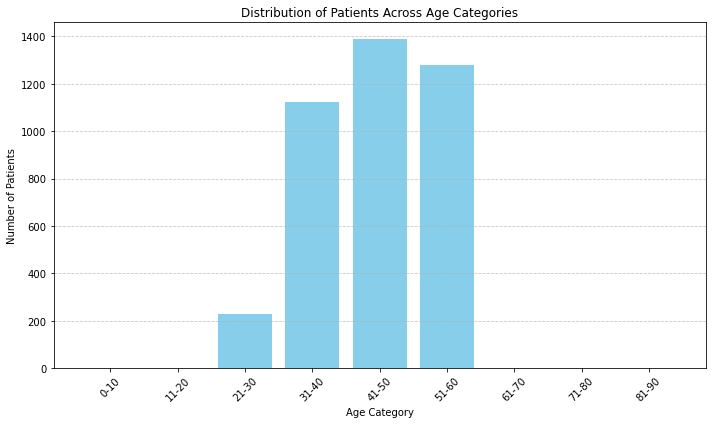

In [80]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
fig_folder="../plots//"

# Load the dataset
df = pd.read_csv('../data/Breast_Cancer.csv')

# Categorize patients based on Age
# Categorize patients based on Age
Age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']  


df['Age_Category'] = pd.cut(df['Age'], bins=Age_bins, labels=Age_labels, right=False)

# Count the number of patients in each age category
age_counts = df['Age_Category'].value_counts().sort_index()

# Plot the bar chart showing the distribution of patients across age categories
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title('Distribution of Patients Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(fig_folder + "age_cat.png")
plt.show()

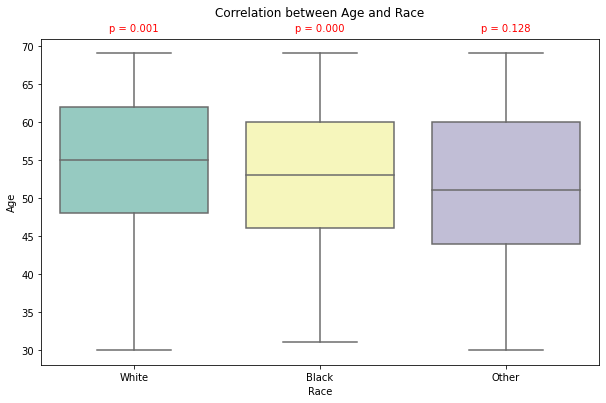

In [82]:

# Plot the correlation between age and race using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='Age', data=df, palette='Set3')
plt.title('Correlation between Age and Race', y=1.05)

# Perform t-tests for pairwise comparisons
white_age = df[df['Race'] == 'White']['Age']
black_age = df[df['Race'] == 'Black']['Age']
other_age = df[df['Race'] == 'Other']['Age']

white_black_pval = stats.ttest_ind(white_age, black_age).pvalue
white_other_pval = stats.ttest_ind(white_age, other_age).pvalue
black_other_pval = stats.ttest_ind(black_age, other_age).pvalue

# Annotate with p-values and significance levels
plt.text(0, white_age.max() + 3, f'p = {white_black_pval:.3f}', ha='center', color='red')
plt.text(1, black_age.max() + 3, f'p = {white_other_pval:.3f}', ha='center', color='red')
plt.text(2, other_age.max() + 3, f'p = {black_other_pval:.3f}', ha='center', color='red')

plt.xlabel('Race')
plt.ylabel('Age')
plt.savefig(fig_folder + "age_race.png")
plt.show()


In [46]:

# Separate age data for each race group
white_age = df[df['Race'] == 'White']['Age']
black_age = df[df['Race'] == 'Black']['Age']
other_age = df[df['Race'] == 'Other']['Age']

# Perform t-tests for pairwise comparisons
white_black_pval = stats.ttest_ind(white_age, black_age).pvalue
white_other_pval = stats.ttest_ind(white_age, other_age).pvalue
black_other_pval = stats.ttest_ind(black_age, other_age).pvalue

# Print p-values
print("White vs. Black p-value:", white_black_pval)
print("White vs. Other p-value:", white_other_pval)
print("Black vs. Other p-value:", black_other_pval)


White vs. Black p-value: 0.0012555792765483553
White vs. Other p-value: 2.8678317568481284e-08
Black vs. Other p-value: 0.12798007526770538


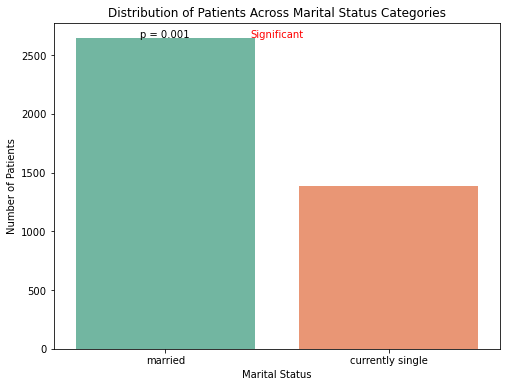

In [48]:
# Distribution of Patients Across Marital Status Categories
# Categorize marital status into 'married' and 'currently single'
df['Marital_Status_Category'] = df['Marital Status'].apply(lambda x: 'married' if x == 'Married' else 'currently single')

# Plot the distribution of patient data across marital status categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status_Category', data=df, palette='Set2')
plt.title('Distribution of Patients Across Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Number of Patients')

# Perform the T-test for significance
married_age = df[df['Marital_Status_Category'] == 'married']['Age']
single_age = df[df['Marital_Status_Category'] == 'currently single']['Age']
p_val = stats.ttest_ind(married_age, single_age).pvalue

# Annotate with p-value and significance level
plt.text(0, married_age.count() + 2, f'p = {p_val:.3f}', ha='center')
plt.text(1, single_age.count() + 2, '', ha='center')  # No p-value for single group

# Determine significance based on p-value
if p_val < 0.05:
    plt.text(0.5, married_age.count() + 10, 'Significant', ha='center', color='red')
else:
    plt.text(0.5, married_age.count() + 10, 'Not Significant', ha='center', color='green')
plt.savefig(fig_folder + "marital_Status.png")
plt.show()


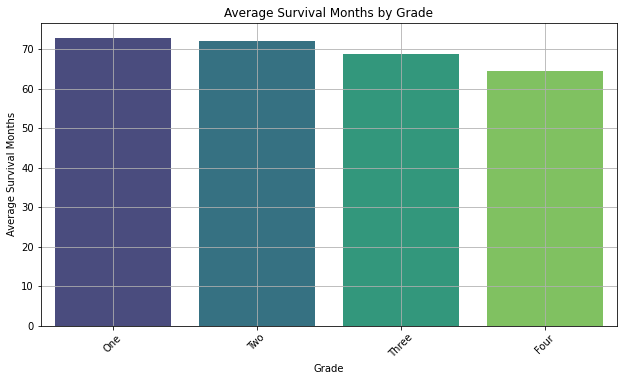

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/Breast_Cancer.csv')

# Convert Grade to numeric values
grade_mapping = {'1': 'One', '2': 'Two', '3': 'Three', ' anaplastic; Grade IV': 'Four'}
df['Grade'] = df['Grade'].map(grade_mapping)

# Define the order for the Grade column
grade_order = ['One', 'Two', 'Three', 'Four']
# Group the data by Grade and calculate the average Survival Months
average_survival = df.groupby('Grade')['Survival Months'].mean().reset_index()

# Convert 'Grade' column to categorical type with the specified order
average_survival['Grade'] = pd.Categorical(average_survival['Grade'], categories=grade_order)

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Grade', y='Survival Months', data=average_survival, palette='viridis')
plt.title('Average Survival Months by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Survival Months')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.grid(True)
plt.savefig(fig_folder + "Grade_survival.png")
plt.show()


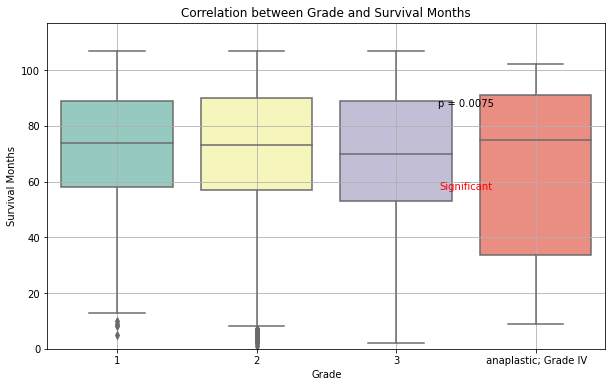

In [52]:
df = pd.read_csv('../data/Breast_Cancer.csv')
# Define the order of grades
grade_order = ['1', '2', '3', ' anaplastic; Grade IV']

# Plot the correlation between Grade and Survival Months using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Survival Months', data=df, order=grade_order, palette='Set3')
plt.title('Correlation between Grade and Survival Months')
plt.xlabel('Grade')
plt.ylabel('Survival Months')

# Adjust y-axis limits
plt.ylim(bottom=0, top=df['Survival Months'].max() + 10)

# Perform Kruskal-Wallis H-test
grades = [df[df['Grade'] == grade]['Survival Months'] for grade in grade_order]
H, p_value = kruskal(*grades)

# Annotate with p-value
plt.text(2.5, df['Survival Months'].max() - 20, f'p = {p_value:.4f}', ha='center')

# Determine significance based on p-value
if p_value < 0.05:
    plt.text(2.5, df['Survival Months'].max() - 50, 'Significant', ha='center', color='red')
else:
    plt.text(2.5, df['Survival Months'].max() - 50, 'Not Significant', ha='center', color='green')
plt.savefig(fig_folder + "grade_survival_4.png")
plt.grid(True)
plt.show()

In [84]:
import pandas as pd
from scipy.stats import kruskal

# Load the dataset
df = pd.read_csv('../data/Breast_Cancer.csv')

# Perform Kruskal-Wallis H-test
grades = [df[df['Grade'] == grade]['Survival Months'] for grade in ['1', '2', '3', ' anaplastic; Grade IV']]
H, p_value = kruskal(*grades)

# Print the p-value
print("P-value of the Kruskal-Wallis H-test:", p_value)


P-value of the Kruskal-Wallis H-test: 0.007483500369062529


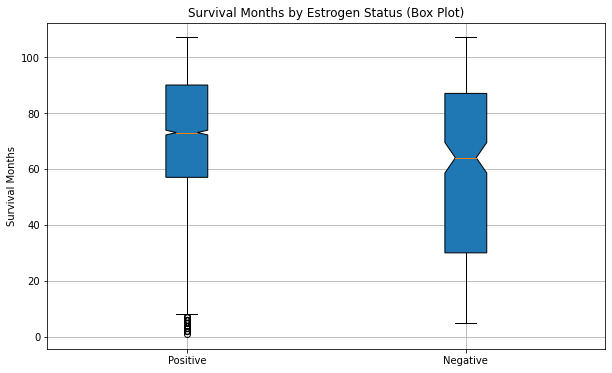

In [55]:

# Create a box plot of survival months based on estrogen status
plt.figure(figsize=(10, 6))
plt.boxplot(
    [df[df['Estrogen Status'] == 'Positive']['Survival Months'],
     df[df['Estrogen Status'] == 'Negative']['Survival Months']],
    labels=['Positive', 'Negative'],
    notch=True,
    vert=True,
    patch_artist=True
)
plt.title('Survival Months by Estrogen Status (Box Plot)')
plt.ylabel('Survival Months')
plt.grid(True)
plt.savefig(fig_folder + "Estrogen_survival.png")
plt.show()

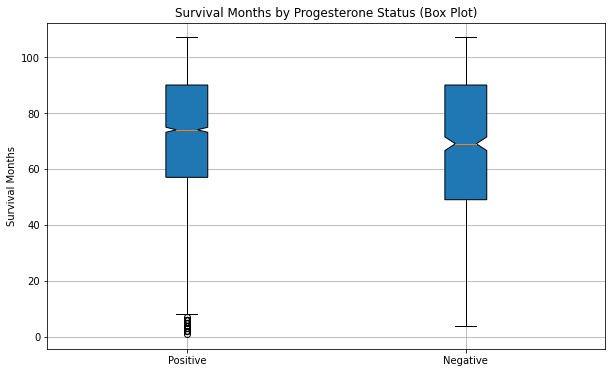

In [56]:

# Create a box plot of survival months based on progesterone status
plt.figure(figsize=(10, 6))
plt.boxplot(
    [df[df['Progesterone Status'] == 'Positive']['Survival Months'],
     df[df['Progesterone Status'] == 'Negative']['Survival Months']],
    labels=['Positive', 'Negative'],
    notch=True,
    vert=True,
    patch_artist=True
)
plt.title('Survival Months by Progesterone Status (Box Plot)')
plt.ylabel('Survival Months')
plt.grid(True)
plt.savefig(fig_folder + "Progesterone_survival.png")
plt.show()


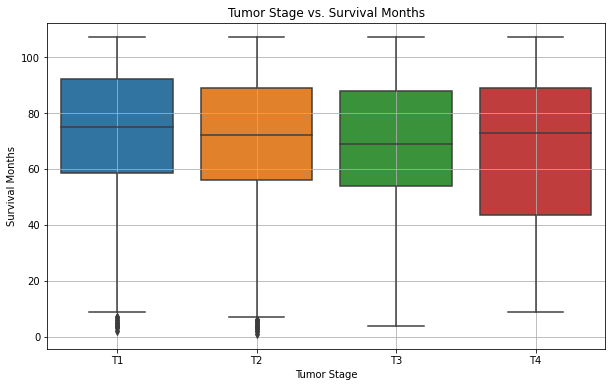

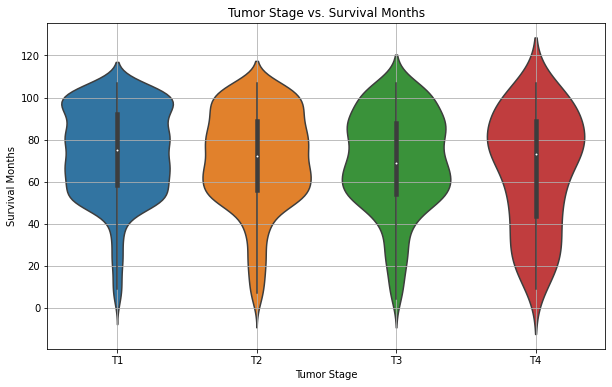

In [58]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()

# Plot using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)
plt.savefig(fig_folder + "Tumor_Stage_survival.png")
plt.show()


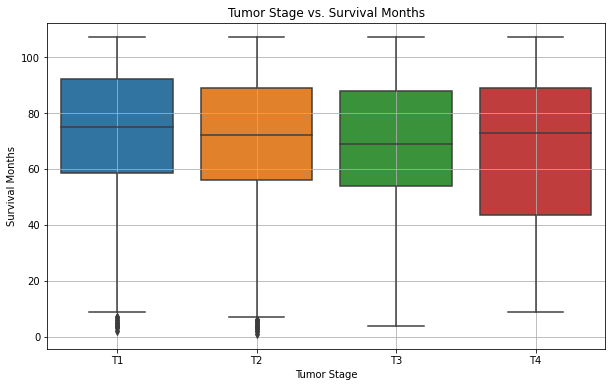

T-test between T1 and T2: p-value = 0.0000
T-test between T1 and T3: p-value = 0.0000
T-test between T1 and T4: p-value = 0.0005
T-test between T2 and T3: p-value = 0.2199
T-test between T2 and T4: p-value = 0.0575
T-test between T3 and T4: p-value = 0.2300


In [59]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()

# Perform t-test for each pair of tumor stages
stages = df['T Stage '].unique()
for i in range(len(stages)):
    for j in range(i+1, len(stages)):
        stage1 = df[df['T Stage '] == stages[i]]['Survival Months']
        stage2 = df[df['T Stage '] == stages[j]]['Survival Months']
        t_stat, p_val = ttest_ind(stage1, stage2)
        print(f"T-test between {stages[i]} and {stages[j]}: p-value = {p_val:.4f}")


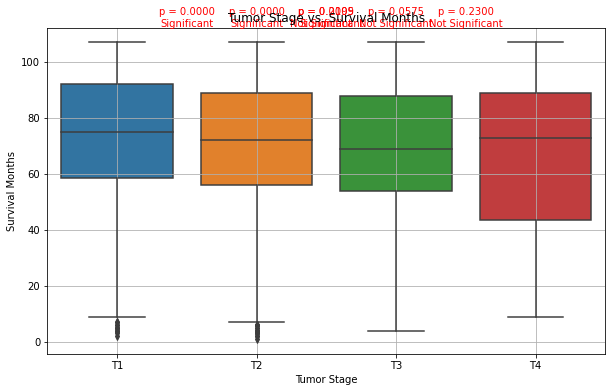

In [60]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform t-test for each pair of tumor stages
stages = df['T Stage '].unique()
for i in range(len(stages)):
    for j in range(i+1, len(stages)):
        stage1 = df[df['T Stage '] == stages[i]]['Survival Months']
        stage2 = df[df['T Stage '] == stages[j]]['Survival Months']
        t_stat, p_val = ttest_ind(stage1, stage2)
        if p_val < 0.05:
            significance = 'Significant'
        else:
            significance = 'Not Significant'
        plt.text(i + (j - i) / 2, df['Survival Months'].max() + 5, f'p = {p_val:.4f}\n{significance}',
                 ha='center', va='bottom', color='red')

plt.show()


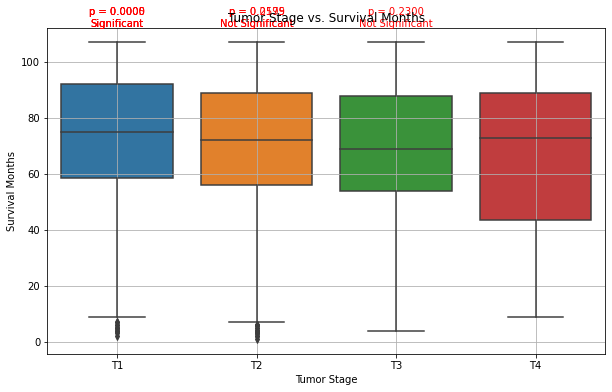

In [61]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform t-test for each pair of tumor stages
stages = df['T Stage '].unique()
for i in range(len(stages)):
    for j in range(i+1, len(stages)):
        stage1 = df[df['T Stage '] == stages[i]]['Survival Months']
        stage2 = df[df['T Stage '] == stages[j]]['Survival Months']
        t_stat, p_val = ttest_ind(stage1, stage2)
        if p_val < 0.05:
            significance = 'Significant'
        else:
            significance = 'Not Significant'
        plt.text(i, df[df['T Stage '] == stages[i]]['Survival Months'].max() + 5, f'p = {p_val:.4f}\n{significance}',
                 ha='center', va='bottom', color='red')

plt.show()


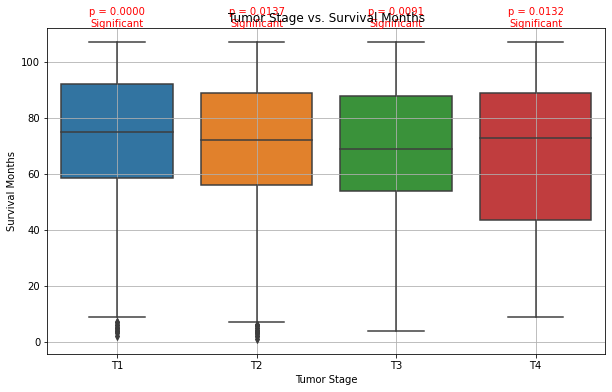

In [62]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform t-test for each T stage against all other stages
stages = df['T Stage '].unique()
for stage in stages:
    stage_data = df[df['T Stage '] == stage]['Survival Months']
    other_data = df[df['T Stage '] != stage]['Survival Months']
    t_stat, p_val = ttest_ind(stage_data, other_data)
    if p_val < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    plt.text(stages.tolist().index(stage), df['Survival Months'].max() + 5, f'p = {p_val:.4f}\n{significance}',
             ha='center', va='bottom', color='red')

plt.show()


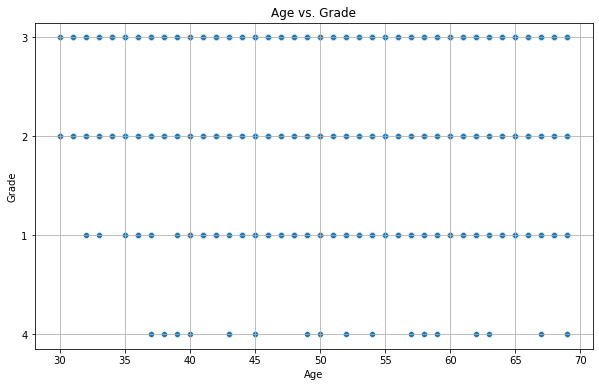

In [63]:

# Plot using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Grade', data=df)
plt.title('Age vs. Grade')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.grid(True)
plt.show()


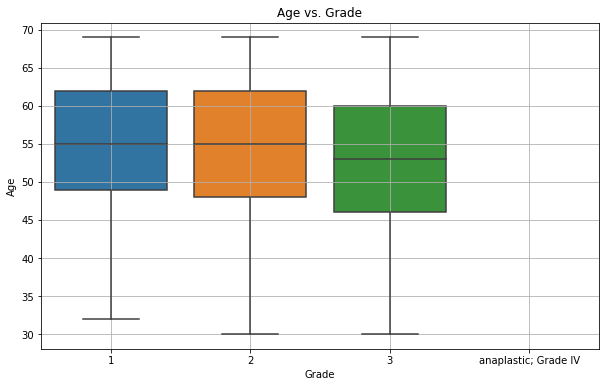

In [64]:
# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Age', data=df, order=['1', '2', '3', 'anaplastic; Grade IV'])
plt.title('Age vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.grid(True)
plt.show()


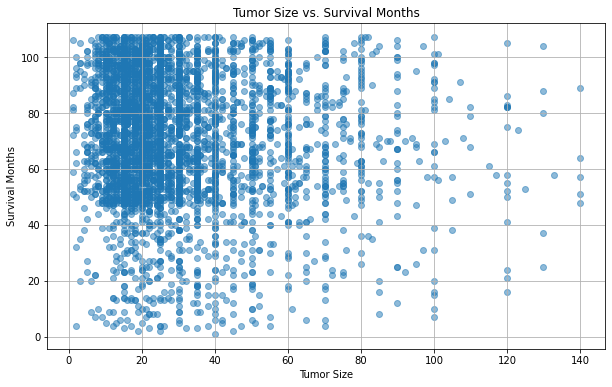

In [65]:

# Plot using a scatter plot Tumer size vs. Survival Months
plt.figure(figsize=(10, 6))
plt.scatter(df['Tumor Size'], df['Survival Months'], alpha=0.5)
plt.title('Tumor Size vs. Survival Months')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()


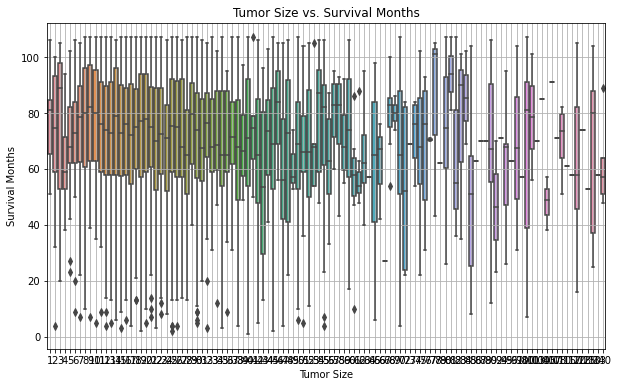

In [66]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor Size', y='Survival Months', data=df)
plt.title('Tumor Size vs. Survival Months')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()


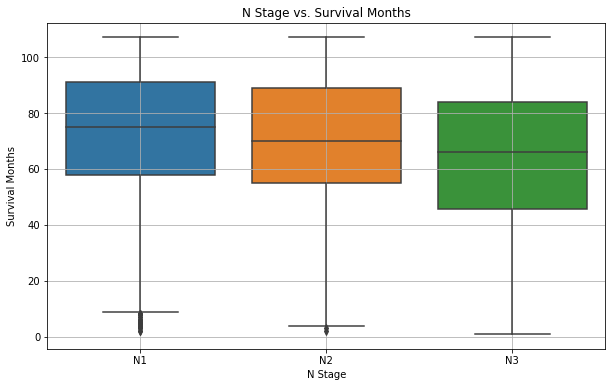

In [67]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='N Stage', y='Survival Months', data=df)
plt.title('N Stage vs. Survival Months')
plt.xlabel('N Stage')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()


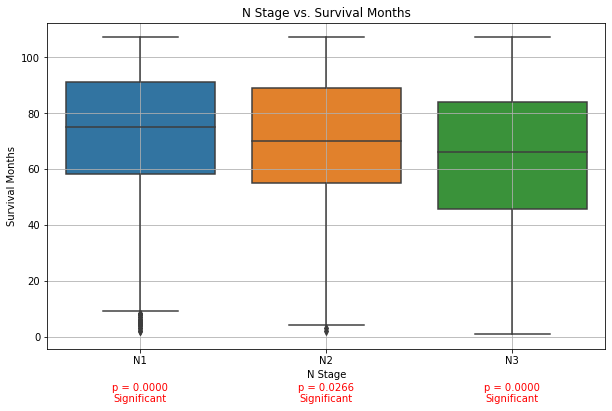

In [68]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='N Stage', y='Survival Months', data=df)
plt.title('N Stage vs. Survival Months')
plt.xlabel('N Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform t-test for each N stage against all other stages
stages = df['N Stage'].unique()
for stage in stages:
    stage_data = df[df['N Stage'] == stage]['Survival Months']
    other_data = df[df['N Stage'] != stage]['Survival Months']
    t_stat, p_val = ttest_ind(stage_data, other_data)
    if p_val < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    plt.text(stages.tolist().index(stage), df['Survival Months'].min() - 25, f'p = {p_val:.4f}\n{significance}',
             ha='center', va='bottom', color='red')

plt.show()


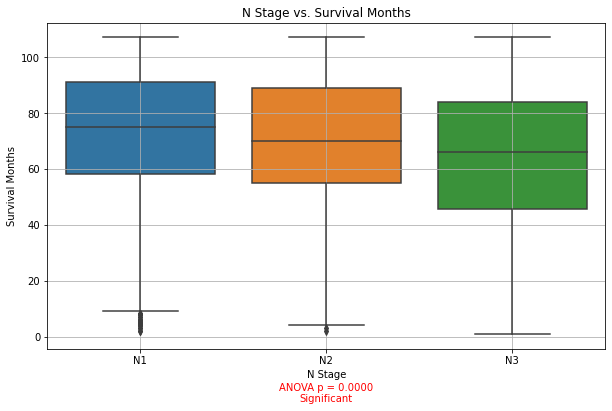

In [69]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='N Stage', y='Survival Months', data=df)
plt.title('N Stage vs. Survival Months')
plt.xlabel('N Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform ANOVA for N Stage
n_stage_groups = [df[df['N Stage'] == stage]['Survival Months'] for stage in df['N Stage'].unique()]
f_stat, p_val = f_oneway(*n_stage_groups)

# Add ANOVA result to the plot
if p_val < 0.05:
    significance = 'Significant'
else:
    significance = 'Not Significant'
plt.text(1, df['Survival Months'].min() - 25, f'ANOVA p = {p_val:.4f}\n{significance}',
         ha='center', va='bottom', color='red')

plt.show()


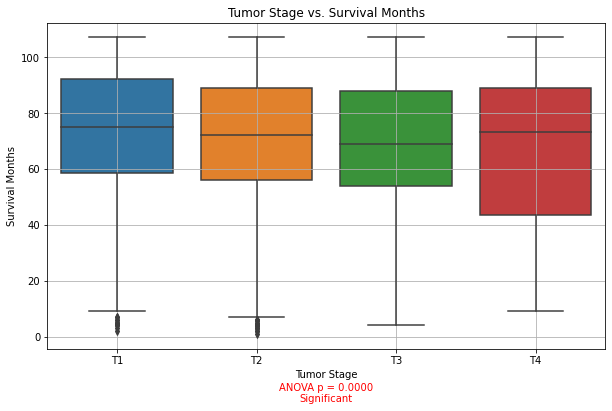

In [70]:

# Plot using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='T Stage ', y='Survival Months', data=df, order=['T1', 'T2', 'T3', 'T4'])
plt.title('Tumor Stage vs. Survival Months')
plt.xlabel('Tumor Stage')
plt.ylabel('Survival Months')
plt.grid(True)

# Perform ANOVA for T Stage
stage_data = [df[df['T Stage '] == stage]['Survival Months'] for stage in df['T Stage '].unique()]
f_stat, p_val = f_oneway(*stage_data)

# Add ANOVA result to the plot
if p_val < 0.05:
    significance = 'Significant'
else:
    significance = 'Not Significant'
plt.text(1.5, df['Survival Months'].min() - 25, f'ANOVA p = {p_val:.4f}\n{significance}',
         ha='center', va='bottom', color='red')

plt.show()


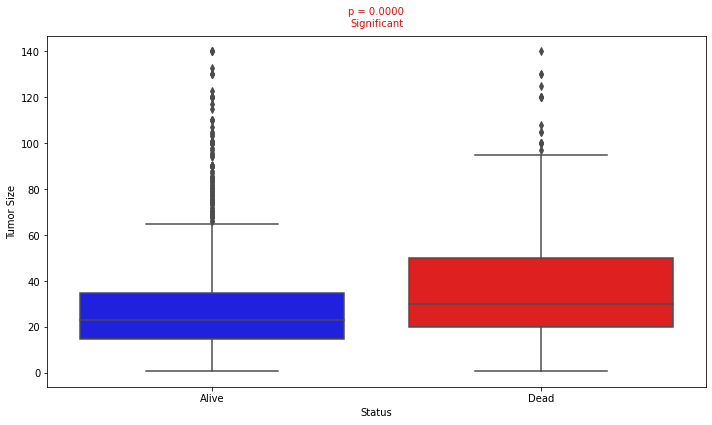

In [71]:

# Split the dataset into two groups based on "Status"
alive_data = df[df['Status'] == 'Alive']['Tumor Size']
dead_data = df[df['Status'] == 'Dead']['Tumor Size']

# Plot overlapping box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=[alive_data, dead_data], palette=['blue', 'red'])

plt.xlabel('Status')
plt.ylabel('Tumor Size')
plt.xticks([0, 1], ['Alive', 'Dead'])

# Perform t-test
t_stat, p_val = ttest_ind(alive_data, dead_data)
if p_val < 0.05:
    significance = 'Significant'
else:
    significance = 'Not Significant'

# Add significance note to the plot
plt.text(0.5, max(alive_data.max(), dead_data.max()) + 10, f'p = {p_val:.4f}\n{significance}',
         ha='center', va='bottom', color='red')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


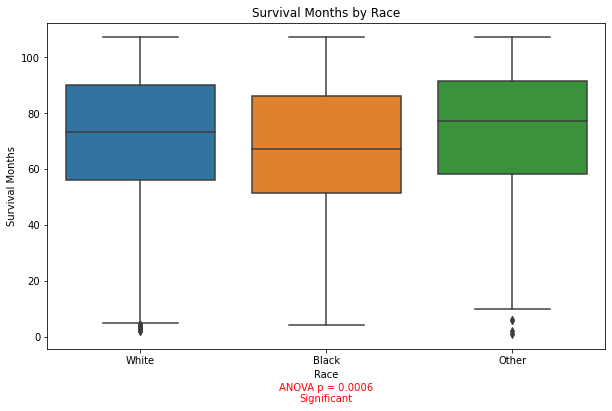

In [72]:

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='Survival Months', data=df)
plt.title('Survival Months by Race')
plt.xlabel('Race')
plt.ylabel('Survival Months')

# Perform ANOVA test
race_groups = [df[df['Race'] == race]['Survival Months'] for race in df['Race'].unique()]
f_stat, p_val = f_oneway(*race_groups)

# Add significance note
if p_val < 0.05:
    significance = 'Significant'
else:
    significance = 'Not Significant'
plt.text(1, df['Survival Months'].min() - 25, f'ANOVA p = {p_val:.4f}\n{significance}',
         ha='center', va='bottom', color='red')

plt.show()


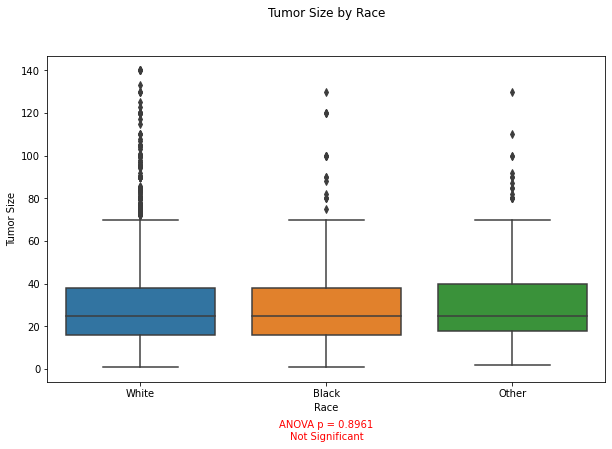

In [73]:

# Create the box plot with appropriate spacing
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='Tumor Size', data=df)
plt.title('Tumor Size by Race', y=1.1  # Adjust title position vertically
          )  # Add y=1.1 to position the title higher
plt.xlabel('Race')
plt.ylabel('Tumor Size')

# Perform ANOVA test
race_groups = [df[df['Race'] == race]['Tumor Size'] for race in df['Race'].unique()]
f_stat, p_val = f_oneway(*race_groups)

# Add significance note below the plot
if p_val < 0.05:
    significance = 'Significant'
else:
    significance = 'Not Significant'
plt.text(1, df['Tumor Size'].min() - 25,  # Adjust vertical position for below-plot placement
         f'ANOVA p = {p_val:.4f}\n{significance}',
         ha='center', va='top', color='red')

plt.show()


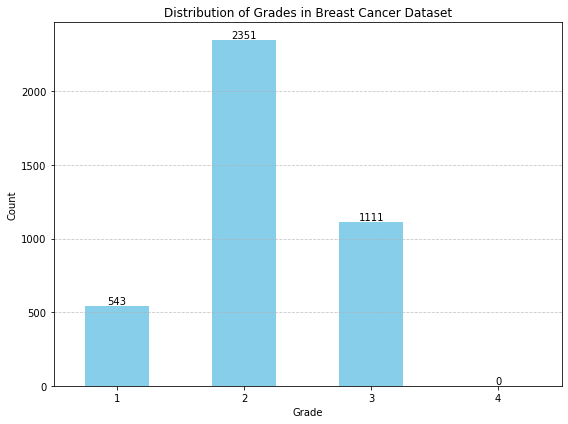

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/Breast_Cancer.csv')


# Convert Grade column to categorical with specified order
df['Grade'] = pd.Categorical(df['Grade'], categories=grade_order, ordered=True)

# Plotting the column "Grade"
plt.figure(figsize=(8, 6))
ax = df['Grade'].value_counts().sort_index().plot(kind='bar', color='skyblue') # Assuming Grade is categorical
plt.title('Distribution of Grades in Breast Cancer Dataset')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
